### **NBA Player Performance Statistics: Data Analysis Project**

Matthew Martinez, Shahram Rahman

CIS9650: Programming for Analytics

**Problem Statement** 
The objective of this project is to make meaningful insights from a dataset of NBA Player performance statistics and identify trends and patterns within the data. 


**Dataset Used:** NBA Player Performance Stats 

https://www.kaggle.com/datasets/iabdulw/nba-player-performance-stats

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [6]:
data = pd.read_csv(r"C:\Users\shahr\OneDrive\Desktop\nba_data_processed.csv")
df = pd.DataFrame(data)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,McKinley Wright IV,PG,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,Thaddeus Young,PF,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,Trae Young,PG,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,Cody Zeller,C,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


**Data Cleaning and preparation**

In [7]:
df = df.dropna()

In [8]:
print(f"number of duplicate rows: {len(df[df.duplicated()])}")

number of duplicate rows: 0


In [9]:
df = df.drop_duplicates(keep = 'first')
print(f"number of rows after duplicates dropped: {len(df)}")

number of rows after duplicates dropped: 552


In [10]:
df.columns 

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [11]:
column_types = df.dtypes
column_types

Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [12]:
columns_to_remove = ['FGA', 'FG%', '3PA','3P%','2PA','2P%', 'eFG%', 'FTA', 'FT%', 'ORB', 'DRB']
df = df.drop(columns_to_remove, axis=1)

In [13]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', '3P', '2P', 'FT',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [14]:
df['Pos'].replace({'SF-SG': 'SF', 'SG-PG': 'SG', 'PF-SF':'PF'}, inplace=True)
df['Pos'].value_counts()

SG    135
PG    114
PF    105
SF    100
C      98
Name: Pos, dtype: int64

**Data Analysis**


In [15]:
salary_data = pd.read_csv(r"C:\Users\shahr\OneDrive\Desktop\2022-23_NBA_Salary.csv")
df_2 = pd.DataFrame(salary_data)
df_3 = pd.merge(df, df_2, on='Player') 
del df_3['Rk']
del df_3['Team']
col1 = df_3.pop('2022-23 Salary')
df_3.insert(4, '2022-23 Salary', col1)
df_3 

,Player,Pos,Age,Tm,2022-23 Salary,G,GS,MP,FG,3P,2P,FT,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,"$2,840,160",38.0,11.0,23.3,3.9,0.5,3.4,1.9,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,"$17,926,829",42.0,42.0,27.0,3.7,0.0,3.7,1.1,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,"$30,351,780",57.0,57.0,35.0,8.4,0.0,8.4,4.4,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,"$3,918,360",39.0,2.0,15.6,1.8,0.9,0.9,0.4,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,"$2,094,120",56.0,18.0,22.0,3.3,1.4,2.0,1.4,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,Christian Wood,C,27.0,DAL,"$14,317,459",50.0,17.0,27.4,6.4,1.7,4.7,3.2,8.0,1.7,0.4,1.2,1.9,2.7,17.6
580,Delon Wright,PG,30.0,WAS,"$7,804,878",31.0,3.0,22.6,2.5,0.9,1.6,0.9,3.2,3.5,1.9,0.3,1.0,1.3,6.7
581,Thaddeus Young,PF,34.0,TOR,"$8,000,000",49.0,9.0,15.5,2.1,0.1,2.0,0.4,3.2,1.4,1.1,0.1,0.8,1.8,4.7
582,Trae Young,PG,24.0,ATL,"$37,096,500",54.0,54.0,35.3,8.5,2.2,6.3,7.9,2.9,10.2,1.1,0.1,4.1,1.5,27.0


In [16]:
df_3['2022-23 Salary'] = df_3['2022-23 Salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [17]:
df_3.sum()

Player            Precious AchiuwaSteven AdamsBam AdebayoOchai A...
Pos               CCCSGPFSGSGSGSGCPGPFPFSFPGSFSFCCSFPGCCCPFSGPGP...
Age                                                         15535.0
Tm                TORMEMMIAUTAMEMTOTUTAMINMILCLENOPMINMILMILORLT...
2022-23 Salary                                         5906565901.0
G                                                           21963.0
GS                                                          10107.0
MP                                                          12204.4
FG                                                           2032.9
3P                                                            642.1
2P                                                           1392.2
FT                                                            884.6
TRB                                                          2150.6
AST                                                          1289.0
STL                                             

In [18]:
df_3.describe()

,Age,2022-23 Salary,G,GS,MP,FG,3P,2P,FT,TRB,AST,STL,BLK,TOV,PF,PTS
count,584.000000,5.810000e+02,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,26.601027,1.016621e+07,37.607877,17.306507,20.897945,3.480993,1.099486,2.383904,1.514726,3.682534,2.207192,0.655479,0.380993,1.166267,1.803425,9.567295
std,4.487841,1.118258e+07,17.654547,20.971603,8.881043,2.346538,0.854982,1.933690,1.502264,2.277582,1.930885,0.427130,0.366287,0.830720,0.750932,6.558828
min,19.000000,1.055220e+05,1.000000,0.000000,2.800000,0.200000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.100000,0.500000
25%,23.000000,2.201520e+06,25.000000,1.000000,13.900000,1.800000,0.400000,1.000000,0.500000,2.100000,0.900000,0.300000,0.100000,0.600000,1.300000,4.900000
50%,26.000000,5.377520e+06,42.000000,5.500000,20.650000,2.800000,1.000000,1.700000,1.000000,3.100000,1.500000,0.600000,0.300000,0.950000,1.800000,7.900000
75%,30.000000,1.300000e+07,52.000000,37.000000,28.625000,4.600000,1.625000,3.225000,1.900000,4.700000,2.900000,0.900000,0.500000,1.500000,2.200000,12.600000
max,42.000000,4.807001e+07,64.000000,63.000000,37.500000,11.300000,4.900000,10.300000,10.100000,12.400000,10.700000,3.200000,3.200000,4.500000,4.500000,33.100000


In [19]:
df_3['Tm'].describe()

count     584
unique     31
top       TOT
freq       64
Name: Tm, dtype: object

In [20]:
df_3['Tm'].value_counts().tail(100)

TOT    64
SAS    24
LAL    23
MIL    21
LAC    21
PHO    20
ORL    20
DEN    19
IND    19
OKC    19
BRK    19
MIN    18
DAL    18
DET    17
HOU    17
CHI    17
POR    17
MIA    17
NOP    16
CLE    16
UTA    16
WAS    15
BOS    15
CHO    15
MEM    15
NYK    15
GSW    15
TOR    14
ATL    14
SAC    14
PHI    14
Name: Tm, dtype: int64

In [21]:
df_3['Tm'].nunique()

31

In [22]:
list(df_3.select_dtypes(include='number').columns)

['Age',
 '2022-23 Salary',
 'G',
 'GS',
 'MP',
 'FG',
 '3P',
 '2P',
 'FT',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [24]:
df_3.to_csv('finalnbadataset.csv')

**Data Vizualization**

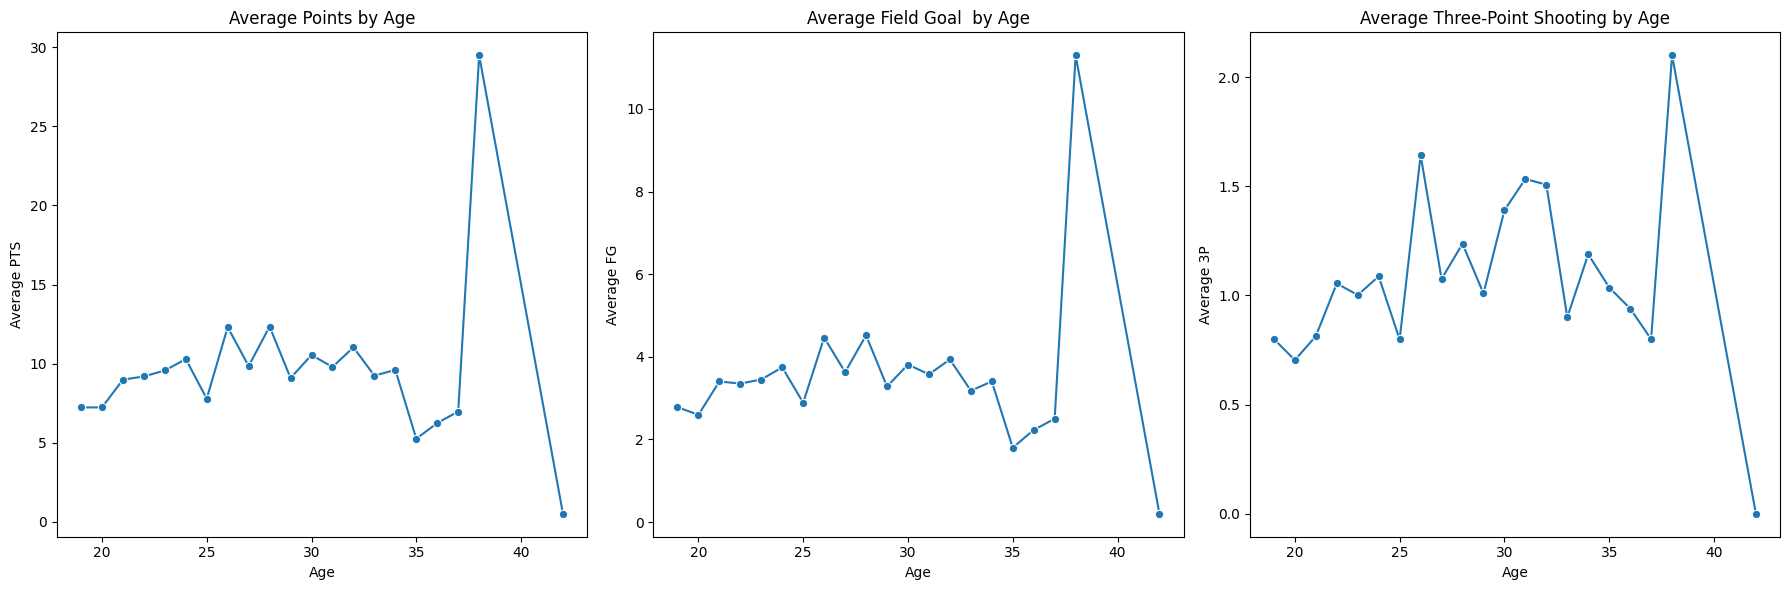

In [25]:
def plot_scoring(metric, title, ax):
    age_stats = df_3.groupby('Age').agg({metric: np.mean}).reset_index()
    sns.lineplot(x='Age', y=metric, data=age_stats, marker='o', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Age')
    ax.set_ylabel(f'Average {metric}')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

metrics_age = ['PTS', 'FG', '3P']
titles_age = ['Average Points by Age', 'Average Field Goal  by Age', 'Average Three-Point Shooting by Age']

for i in range(3):
    plot_scoring(metrics_age[i], titles_age[i], axes[i])

plt.tight_layout()
plt.show()

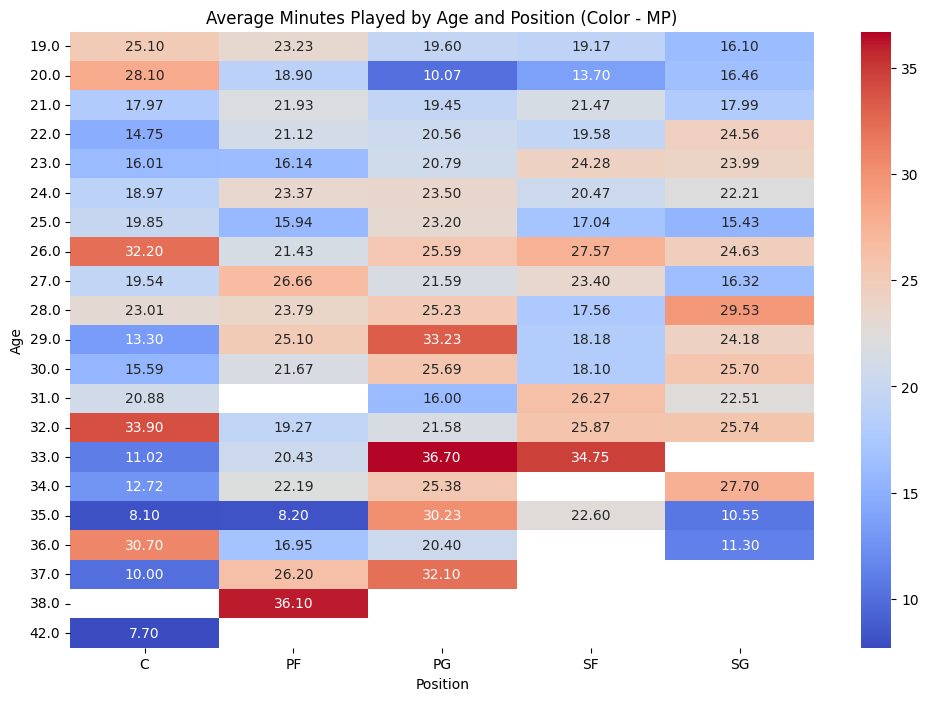

In [26]:
age_position_mp = df_3.groupby(['Age', 'Pos'])['MP'].mean().reset_index()

age_position_mp_matrix = age_position_mp.pivot_table(index='Age', columns='Pos', values='MP')

plt.figure(figsize=(12, 8))
sns.heatmap(age_position_mp_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Minutes Played by Age and Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.show()